# Example usage

Running the FRAGMENT-MNP model is a two-step process. First, the model must be initialised by passing it config and input data. Example config and data is given in the {mod}`fragmentmnp.examples` module, which is used here. Then the {func}`fragmentmnp.FragmentMNP.run()` method runs the model and returns a {class}`FMNPOutput <fragmentmnp.output.FMNPOutput>` object with the output data.

In [1]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data
import matplotlib.pyplot as plt
import numpy as np

# Create the model and pass it config and data. minimal_config and
# minimal_data are an examples of a dicts with only required values.
# full_{config|data} are examples of a dicts with all values given
fmnp = FragmentMNP(minimal_config, minimal_data)
# Run the model
output = fmnp.run()

The returned {mod}`FMNPOutput <fragmentmnp.output.FMNPOutput>` object contains a timeseries `t`, particle mass and number concentrations for each size class, `c` and `n`, total concentration of dissolved organics `c_diss` and concentration of mineralised polymer `c_min`. See the {mod}`FMNPOutput <fragmentmnp.output.FMNPOutput>` API reference for more details. A convenient plotting function can be used to quickly plot model output (see [](./plotting.ipynb)):

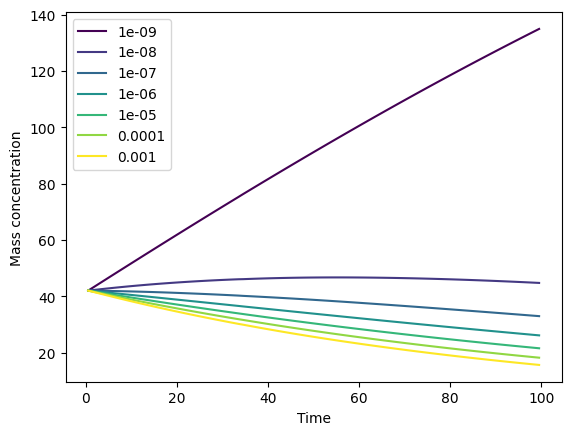

In [2]:
# Plot the time evolution of mass concentrations
_ = output.plot()

:::{note}
If you are running the model via a script, rather than an interactive environment (e.g. Jupyter), you can pass `show=True` to the `plot` function in order to automatically display the plot, i.e. `output.plot(show=True)`. `show` is `False` by default so as not to inhibit users from [building more complex plots](plotting:fig-ax) by returning `fig, ax` and using these.
:::

We can also plot the particle number concentrations `n`. Note the logged y-axis:

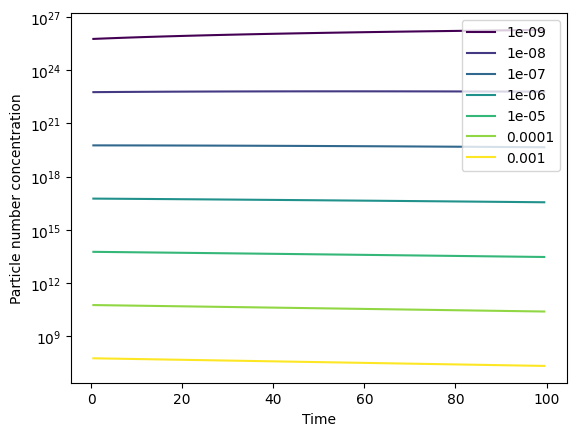

In [3]:
_ = output.plot(type='particle_number_conc', log_yaxis=True)

## Dissolution

The example data has a dissolution rate `k_diss` of 0. Let's simulate dissolution by setting this to a constant value of 0.001. For more `k_diss` (and `k_frag` and `k_min`) values that are more complex dependencies on time and surface area, see [](./fragmentation-dissolution-rates.ipynb).

In [11]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data

# Change the dissolution parameters
minimal_data['k_diss'] = 0.001

# Rerun the model
fmnp = FragmentMNP(minimal_config, minimal_data)
output = fmnp.run()

We can use the {func}`FMNPOutput.plot() <fragmentmnp.output.FMNPOutput.plot()>` method again to plot the time evolution graph with dissolution mass concentrations:

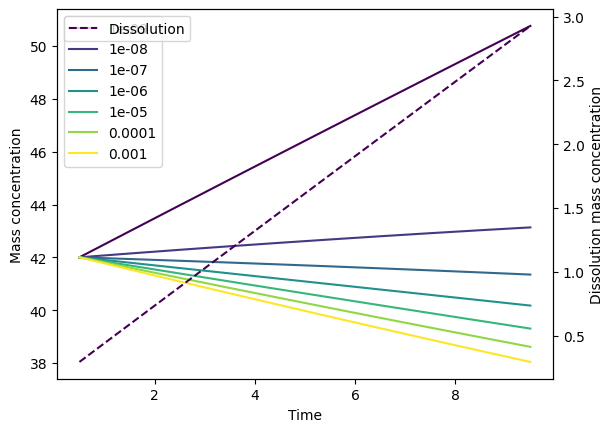

In [13]:
# Plot the model outputs with dissolution included
_ = output.plot(plot_dissolution=True)

If we were interested in mineralisation (see [](./dissolution-mineralisation.ipynb)) then we can plot this be specifying `plot_mineralisation=True`.